## Plot 2d slices of Perr code ##

In [8]:
from __future__ import print_function, division

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from nbodykit import style

from collections import OrderedDict, namedtuple
import cPickle
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, MaxNLocator, AutoMinorLocator
import numpy as np
import os
import random
from scipy import interpolate as interp

from matplotlib import rcParams
from matplotlib import rc
from matplotlib.ticker import MultipleLocator, MaxNLocator
import sys
import re
from matplotlib import colorbar


from nbodykit.source.mesh.bigfile import BigFileMesh

plt.style.use(style.notebook)
colors = [d['color'] for d in style.notebook['axes.prop_cycle']]
linestyles = ['-', (0, [12, 6]), (10, [14, 4, 2, 4]), (0, [3, 3]), (0, [1, 1]), (0, [8, 4])]

### Global options ###

In [9]:
basedir = '/Users/mschmittfull/scratch_data//perr/slices/data/mschmittfull/perr/grids4plots/'

# Choose pickle file to plot
pickle_fname = 'main_calc_Perr_2020_Sep_25_13:03:53_time1601039033.dill' # RunB1d
#pickle_fname = 'main_calc_Perr_2020_Aug_26_02:49:57_time1598410197.dill' # RunB2, with wrong G2par sign
#pickle_fname = 'main_calc_Perr_2020_Sep_25_17:15:52_time1601054152.dill' # RunB2d, with right G2par sign

# Choose slice
slice_fname = 'SLICE_R2_5-5_0-1535_0-1535'

#targetstr = 'delta_gPTC_11.5'
targetstr = 'delta_gPTC'



### Read and plot all slices ###

In [10]:
slicedir = os.path.join(basedir, pickle_fname, slice_fname)
fnames = os.listdir(slicedir)
print(fnames)

['hat_delta_gPTC_RSD001_from_1_+G2par_Tdeltalin2G23_SHIFTEDBY_PsiZ_RSD001_R0.0', 'delta_gPTC_R0.0', '[hat_delta_gPTC_RSD001_from_1_+G2par_Tdeltalin2G23_SHIFTEDBY_PsiZ_RSD001]_MINUS_[delta_gPTC_RSD001]_R0.0', 'delta_gPTC_RSD001_R0.0', '[hat_delta_gPTC_from_1_+G2par_Tdeltalin2G23_SHIFTEDBY_PsiZ]_MINUS_[delta_gPTC]_R0.0', 'hat_delta_gPTC_from_1_+G2par_Tdeltalin2G23_SHIFTEDBY_PsiZ_R0.0']


In [11]:
if False:
    # plot all files in folder
    for RSD in [False,True]:
        print('RSD: ', RSD)
        fig, axarr = plt.subplots(len(fnames)//2,1,figsize=(18,6*len(fnames)//2))
        counter = -1
        for fname in sorted(fnames):
            if RSD and ('RSD' not in fname):
                continue
            if (not RSD) and ('RSD' in fname):
                continue            
            counter += 1
            ax = axarr[counter]
            full_fname = os.path.join(slicedir, fname)
            mesh = BigFileMesh(full_fname, dataset='Field', header='header')
            print(mesh.attrs)
            rfield = mesh.compute(mode='real')
            ax.imshow(rfield[0,:300,:100].T)
            ax.set_title(fname, fontsize=10)


### Utility plot functions ###

In [12]:
def set_colors_im_labels(ax, im, fg_color='white', bg_color='black'):
    # set figure facecolor
    ax.patch.set_facecolor(bg_color)
    # set tick and ticklabel color
    im.axes.tick_params(which='major', color=fg_color, labelcolor=fg_color)
    im.axes.tick_params(which='minor', color=fg_color, labelcolor=fg_color)
    #im.axes.tick_params(labelcolor=fg_color)
    # set imshow outline
    for spine in im.axes.spines.values():
        spine.set_edgecolor(fg_color)
        
def set_colors_cbar_labels(ax, cb, fg_color='white', bg_color='black'):
    # set colorbar tick color
    #cb.ax.yaxis.set_tick_params(color=fg_color)
    # set colorbar edgecolor
    #cb.outline.set_edgecolor(fg_color)
    # set colorbar ticklabels
    plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color=fg_color)
    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)


def plot_ruler(x, y, dx, dy, capsize=None, ax=None, line_kwargs={}):
    rcParams.update({'lines.solid_capstyle': u'projecting'})
    # plot middle line
    ax.plot(np.array([x, x + dx]), np.array([y, y + dy]), **line_kwargs)
    if capsize is None:
        capsize = 0.1 * dx
    # plot left and right cap
    ax.plot(np.array([x, x]), np.array([y - capsize / 2.0, y + capsize / 2.0]),
            **line_kwargs)
    ax.plot(np.array([x + dx, x + dx]),
            np.array([y - capsize / 2.0, y + capsize / 2.0]), **line_kwargs)
    rcParams.update({'lines.solid_capstyle': u'round'})


### Read and plot specific slices ###

Read /Users/mschmittfull/scratch_data//perr/slices/data/mschmittfull/perr/grids4plots/main_calc_Perr_2020_Sep_25_13:03:53_time1601039033.dill/SLICE_R2_5-5_0-1535_0-1535/delta_gPTC_R0.0
min, max truth:  -1.0000076293945312 82.57010650634766
residual min, max: -48.14295196533203 48.40793228149414
Made ../pdf/slices_RSD0.pdf
Read /Users/mschmittfull/scratch_data//perr/slices/data/mschmittfull/perr/grids4plots/main_calc_Perr_2020_Sep_25_13:03:53_time1601039033.dill/SLICE_R2_5-5_0-1535_0-1535/delta_gPTC_RSD001_R0.0
min, max truth:  -1.0000066757202148 81.922607421875
residual min, max: -56.94529342651367 34.497169494628906
Made ../pdf/slices_RSD1.pdf


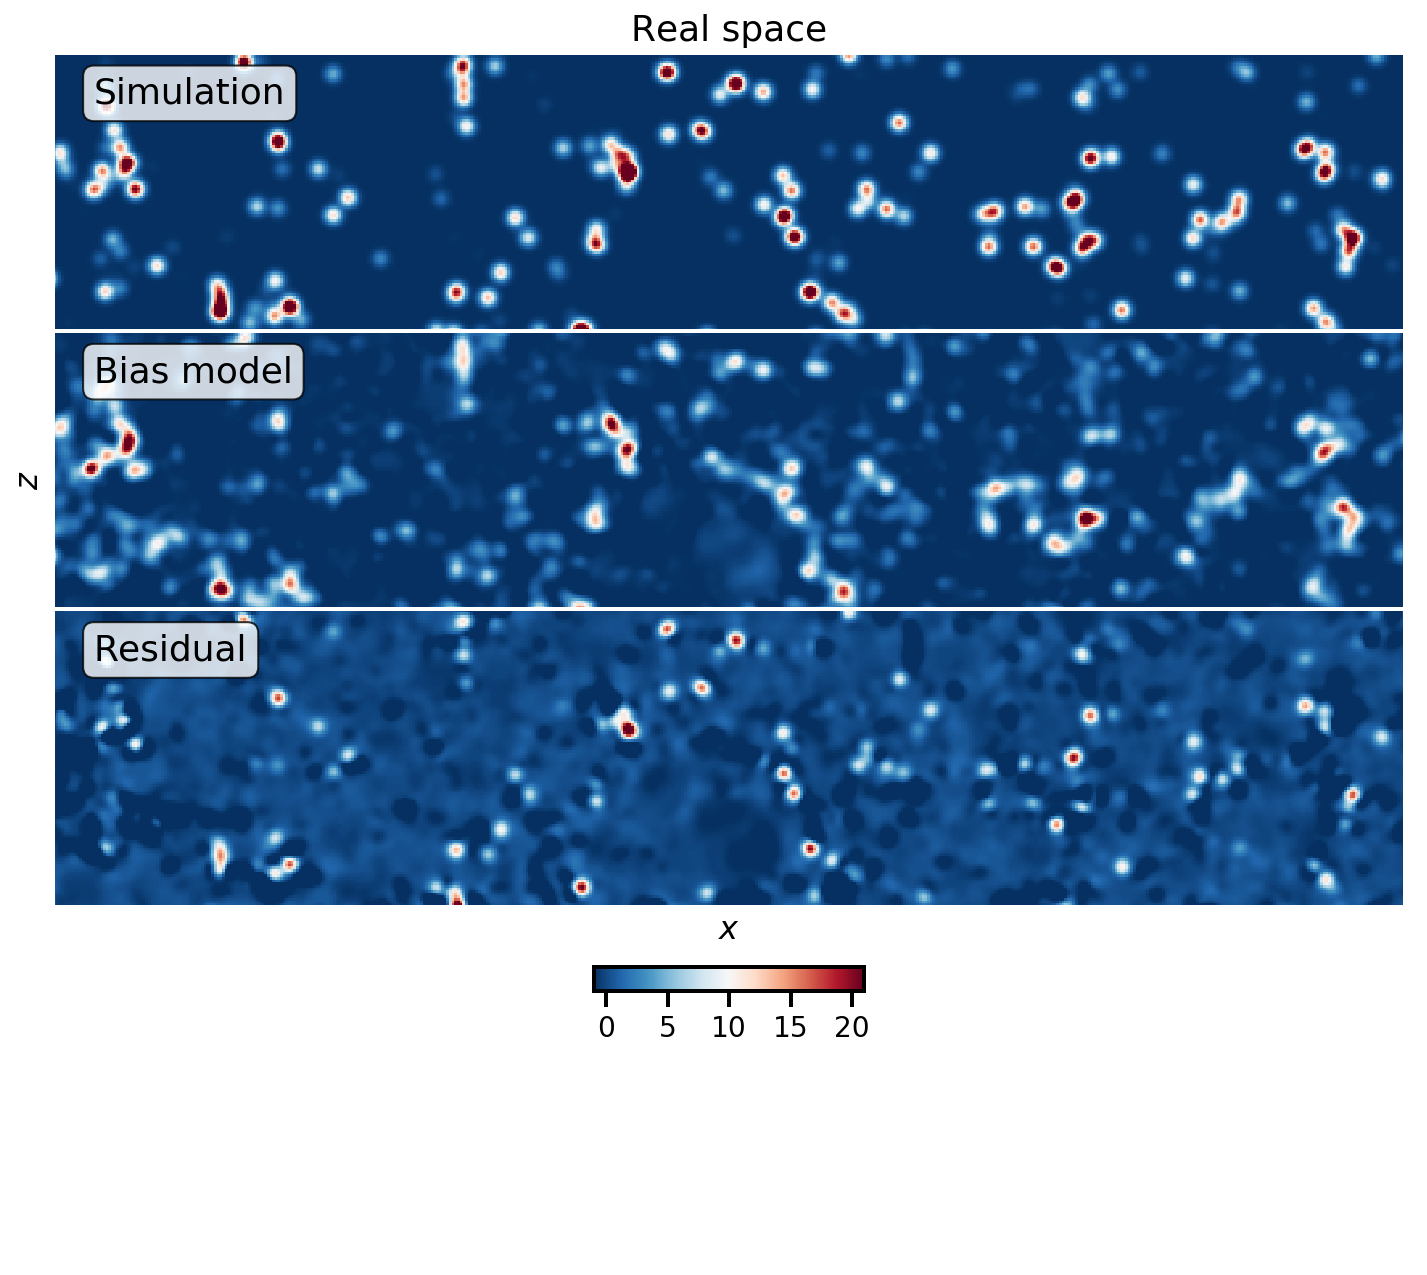

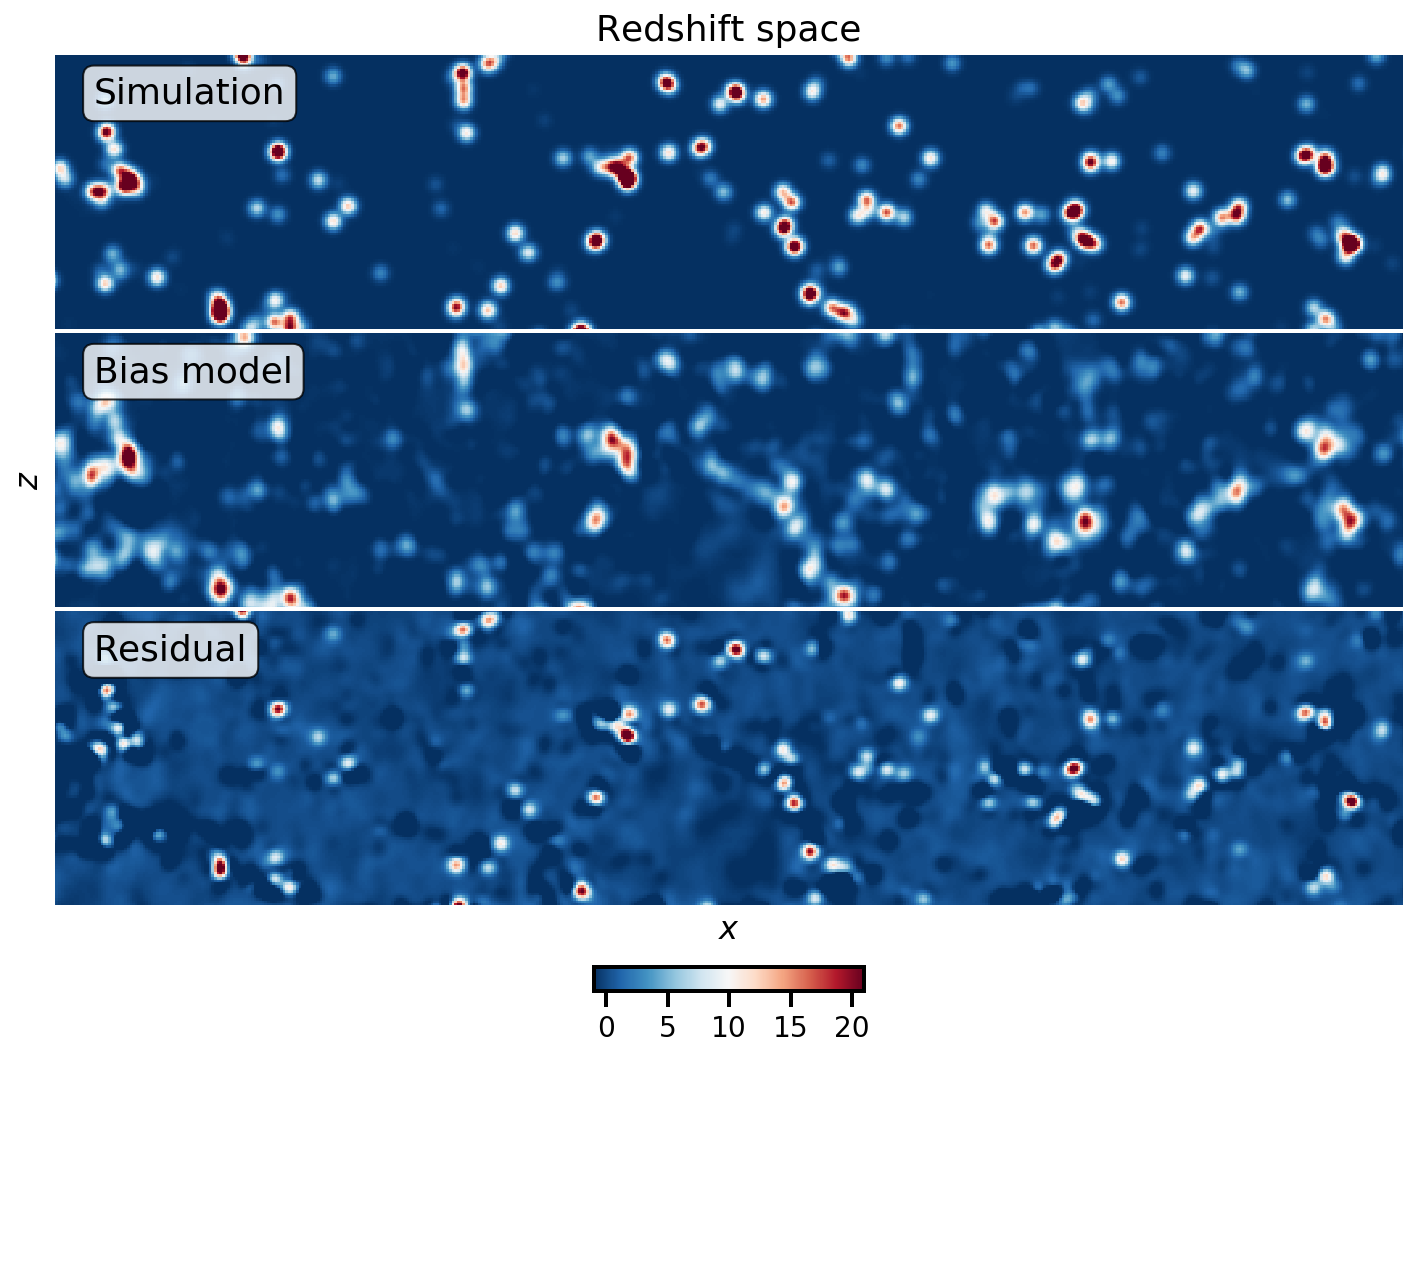

In [13]:
# what to plot
appdx = '_R0.0'

# cosmetics
fs = 18
xtext, ytext = 0.03, 0.83
show_cbar = True
show_title = True
show_labels = True
bbox_props = dict(boxstyle='round',
              facecolor='white',
              alpha=0.8,
              linewidth=1)  #,pad=0.3)
imshow_kw = dict(interpolation='none',  # none, nearest, gaussian
                 cmap='RdBu_r',
                 vmin=-1,
                 vmax=21,
                 extent=(0,1500.,0,1500.)
                )


# do plot
for RSD in [False, True]:
    plots_arr = [None,None,None]
    if RSD:
        RSDstr = '_RSD001'
    else:
        RSDstr = ''
    modelstr = 'hat_%s%s_from_1_+G2par_Tdeltalin2G23_SHIFTEDBY_PsiZ' % (targetstr, RSDstr)
   
    fig, axarr = plt.subplots(3,1,figsize=(10,7.5), sharex=True, sharey=True)

    # Truth
    ax = axarr[0]
    full_fname = os.path.join(slicedir, targetstr+RSDstr+appdx)
    print('Read %s' % full_fname)
    mesh = BigFileMesh(full_fname, dataset='Field', header='header')
    rfield = mesh.compute(mode='real')
    plots_arr[0] = ax.imshow(rfield[0,:,:].T, **imshow_kw)
    print('min, max truth: ', np.min(rfield), np.max(rfield))
    if show_labels:
        mypatch = ax.text(xtext, ytext, 'Simulation', fontsize=fs, transform=ax.transAxes,color='black',bbox=bbox_props)
    #mypatch.get_frame().set_linewidth(1)
        
    # Model
    ax = axarr[1]
    full_fname = os.path.join(slicedir, modelstr+RSDstr+appdx)
    mesh = BigFileMesh(full_fname, dataset='Field', header='header')
    rfield = mesh.compute(mode='real')
    plots_arr[1] = ax.imshow(rfield[0,:,:].T, **imshow_kw)
    if show_labels:
        mypatch = ax.text(xtext, ytext, 'Bias model', fontsize=fs, transform=ax.transAxes,color='black',bbox=bbox_props)

        
    # Residual
    ax = axarr[2]
    full_fname = os.path.join(slicedir, '[%s%s]_MINUS_[%s%s]%s' % (modelstr, RSDstr, targetstr, RSDstr, appdx))
    mesh = BigFileMesh(full_fname, dataset='Field', header='header')
    rfield = mesh.compute(mode='real')
    plots_arr[2] = ax.imshow(-(rfield[0,:,:].T), **imshow_kw)
    print('residual min, max:', np.min(rfield), np.max(rfield))
    if show_labels:
        mypatch = ax.text(xtext, ytext, 'Residual', fontsize=fs, transform=ax.transAxes,color='black',bbox=bbox_props)

    ax.set_xlim((0,500))
    ax.set_ylim((110,220))
    
    ## -------------------------------------
    ## COSMETICS BELOW....
    
    # units are roughly Mpc/h if cell size is ~1Mpc/h.
    dz = mesh.attrs['BoxSize'][2]/mesh.attrs['Nmesh'][2]
    if dz > 0.95 and dz <= 1.05:
        #axarr[-1].set_xlabel(r'$x\;[\mathrm{Mpc}/h]$')
        #axarr[1].set_ylabel(r'$z\;[\mathrm{Mpc}/h]$')
        pass
    axarr[-1].set_xlabel(r'$x$')
    axarr[1].set_ylabel(r'$z$')
    
    if show_title:
        if RSD:
            axarr[0].set_title('Redshift space', fontsize=fs)
        else:
            axarr[0].set_title('Real space', fontsize=fs)
      
    for ax in axarr:
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        
        
    if show_cbar:
        ## more plot cosmetics

        # add ruler to lowest ax
        ax = axarr[-1]
        ruler_x, ruler_y, ruler_dx = 400, -15, 20
        plot_ruler(x=ruler_x,
                   y=ruler_y,
                   dx=ruler_dx,
                   dy=0,
                   ax=ax,
                   capsize=6,
                   line_kwargs={
                       'color': 'w',
                       'alpha': 1,
                       'lw': 2,
                       'zorder': 10
                   })
        ax.text(ruler_x + ruler_dx + 10,
                ruler_y,
                '$%d\\;\\mathrm{Mpc}/h$' % ruler_dx,
                fontsize=fs - 4,
                color='w',
                zorder=10,
                alpha=1,
                verticalalignment='center')

        if False:
            # add title with halo mass
            ax = axarr[0]
            plt.sca(ax)
            plt.title('$\\log M=$%.1f$-$%.1f' % (log10Mmin, log10Mmax), y=1.01)

        plt.tight_layout(w_pad=0, h_pad=-2)

        # single colorbar
        cbar_orientation = 'horizontal'
        cax, kw = colorbar.make_axes([ax for ax in axarr.flat],
                                     fraction=0.04,
                                     aspect=11,
                                     shrink=0.2,
                                     pad=0.05,
                                     orientation=cbar_orientation,
                                     anchor=(0.5, 0))
        if False:
            cax.set_title('$\\delta$', fontsize=constants.xylabelfs - 4)

        cbar = plt.colorbar(plots_arr[-1], cax=cax, **kw)
        cbar.solids.set(alpha=1)
        #cbar = plt.colorbar(myplot, shrink=plot_opts['cbar_shrink'], orientation='vertical',
        #pad=0.175, fraction=0.1, aspect=10)

        #cbar.set_ticks(np.linspace(vmin,vmax,3))

        cbar.set_ticks([0, 5, 10, 15, 20 ])
        cbar.ax.tick_params(labelsize=fs - 4)
        
    # set colors
    fg_color, bg_color = 'k', 'w'
    for counter in range(len(plots_arr)):
        set_colors_im_labels(axarr[counter],
                             plots_arr[counter],
                             fg_color='w',
                             bg_color='w')
    if show_cbar:
        set_colors_cbar_labels(ax, cbar, fg_color=fg_color, bg_color=bg_color)
    fig.patch.set_facecolor(bg_color)
       
    if show_cbar:
        pass  
        #plt.tight_layout(w_pad=0, h_pad=0)
    else:
        plt.tight_layout(w_pad=0, h_pad=-1.1)

    fname = '../pdf/slices_RSD%d.pdf' % (int(RSD))
    plt.savefig(fname)
    print('Made %s' % fname)
        

In [ ]:
mesh.attrs